In [1]:
from keras.datasets import mnist

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_img, train_labels) = mnist.load_data()[0]
(test_img, test_labels) = mnist.load_data()[1]

In [3]:
print("Shape of Train Images: ",train_img.shape)
print("Shape of Test Images: ",test_img.shape)   
#60000 bin train için pikseli 28 28 
# veri setinin pikselleri için 

Shape of Train Images:  (60000, 28, 28)
Shape of Test Images:  (10000, 28, 28)


In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_img[5], cmap='gray_r')
 # herhangi bir resmi çekmek için
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
for row in train_img[5]:
    for i in row:
        print("%3s "%i, end='')
    print()
# görüntünün piksel değerleri için

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 216  31  37 252 252  60   0   0   0 

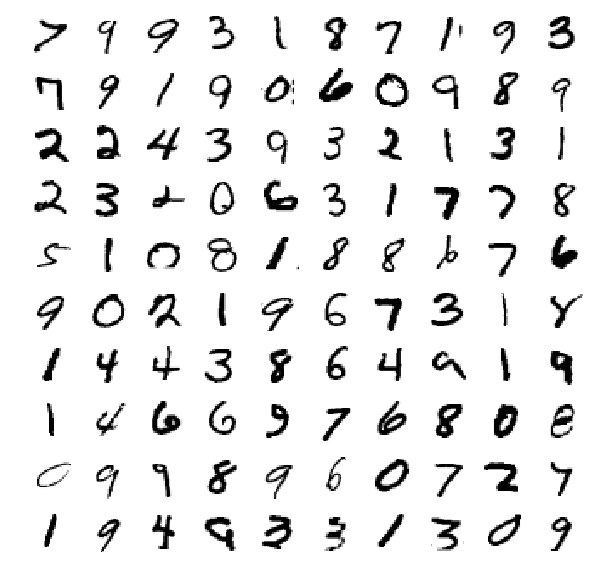

In [6]:
import numpy as np

n, k, figsize = 10, 10, (10, 10)
fig, ax = plt.subplots(n, k, figsize=figsize)
for i in range(n):
    for j in range(k):
        ax[i,j].imshow(train_img[np.random.randint(train_img.shape[0])], cmap='gray_r')
        ax[i,j].axis('off')

plt.show()

In [7]:
train_img = train_img.reshape((60000,28*28)) #verileri çekiyorrum 
train_img = train_img.astype("float32")/255  # verileri 0 1 arasına getiriyorum 

test_img = test_img.reshape((10000,28*28))
test_img = test_img.astype("float32")/255
# neden 255 renk kodları  0 255 arasındadır çünki

In [8]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels) 
#etiketleri  katagorize etmek için

In [9]:
# model oluşturmaya  başlayalım 
from keras import models
from keras import layers

In [10]:
model = models.Sequential()
model.add(layers.Dense(512,activation="relu", input_shape=(28*28,)))
model.add(layers.Dense(10,activation="softmax")) #çıkış

In [11]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [16]:
#model eğitimi
history = model.fit(train_img,
                    train_labels,
                    epochs=10,
                    batch_size=128)
# loss : kaybım , gerçek değer ile bulunan değer arasındaki oran 
#accuracy : başarımım 

Epoch 1/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0080 - acc: 0.9978
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0062 - acc: 0.9984
Epoch 3/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.0045 - acc: 0.9987
Epoch 4/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.0036 - acc: 0.9990
Epoch 5/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0030 - acc: 0.9993
Epoch 6/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.0025 - acc: 0.9993
Epoch 7/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0022 - acc: 0.9994
Epoch 8/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0017 - acc: 0.9996
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0015 - acc: 0.9996
Epoch 10/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0010 - acc: 0.999

In [15]:
history_dict = history.history
print("Keys: ",history_dict.keys())

Keys:  dict_keys(['loss', 'acc'])


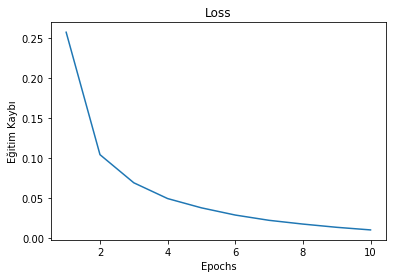

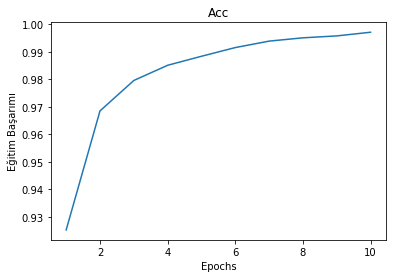

In [17]:
import matplotlib.pyplot as plt

epochs = range(1,11)
loss = history_dict['loss']
acc = history_dict['acc']

plt.plot(epochs,loss)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Eğitim Kaybı")
plt.show()

plt.plot(epochs,acc)
plt.title("Acc")
plt.xlabel("Epochs")
plt.ylabel("Eğitim Başarımı")
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(test_img,test_labels)
print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_acc)
# inceleme adımı ,
# geliştirilen modeli test verileri üzerinde deneyeceğim

10000/10000 [==============================] - 0s 34us/step
Test Loss:  0.1006516314135009
Test Accuracy:  0.9818
